In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

# Load the dataset

In [20]:
df=pd.read_csv("IMDB Dataset_TextPreprocessing.csv")

#Print the first five rows of dataset
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [21]:
df["review"][31]

'"Ardh Satya" is one of the finest film ever made in Indian Cinema. Directed by the great director Govind Nihalani, this one is the most successful Hard Hitting Parallel Cinema which also turned out to be a Commercial Success. Even today, Ardh Satya is an inspiration for all leading directors of India.<br /><br />The film tells the Real-life Scenario of Mumbai Police of the 70s. Unlike any Police of other cities in India, Mumbai Police encompasses a Different system altogether. Govind Nihalani creates a very practical Outlay with real life approach of Mumbai Police Environment.<br /><br />Amongst various Police officers & colleagues, the film describes the story of Anand Velankar, a young hot-blooded Cop coming from a poor family. His father is a harsh Police Constable. Anand himself suffers from his father\'s ideologies & incidences of his father\'s Atrocities on his mother. Anand\'s approach towards immediate action against crime, is an inert craving for his own Job satisfaction. The

In [22]:
#Check the shape of the dataset
df.shape

(50000, 2)

# Preprocess the dataset

In [23]:
#Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [24]:
#Check the describtion of the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [25]:
# Check the missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [26]:
# Check the duplicated values
df.duplicated().sum()

418

In [27]:
#Drop the duplicated values
df=df.drop_duplicates()

#Check the duplicated values
df.duplicated().sum()

0

In [28]:
df.shape

(49582, 2)

In [29]:
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [30]:
# Label encoding
df["sentiment"]=LabelEncoder().fit_transform(df["sentiment"])

# EDA

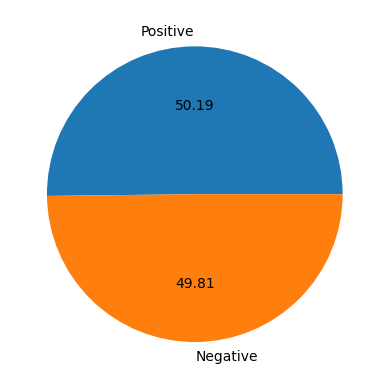

In [31]:
plt.pie(df["sentiment"].value_counts(),labels=["Positive","Negative"],autopct="%0.2f")
plt.show()

# Text Preprocessing

In [32]:
#Check the text in lowercase or not
df["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## Lowercase

In [41]:
# all the text convert the lowercase
df["review"]=df["review"].str.lower()
# Print the first five rows
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


## Remove the HTML Tags 

In [43]:
#By using regular expression import(re)
import re

#Create the function for removing HTML tags
def remove_HTML_Tags(text):
    pattern=re.compile("<.*?>")
    return pattern.sub(r"",text)

In [76]:
#Check the function is work correctly
remove_HTML_Tags("am<br />ir <br />ali")

'amir ali'

In [77]:
#Apply on the review column
df["review"]=df["review"].apply(remove_HTML_Tags)

df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


## Remove the URLs

In [83]:
def remove_URLs(text):
    pattern=re.compile(r"https?://\S+|www\.\S+")
    return pattern.sub(r'',text)


In [84]:
text1="Check out my ML code https://.kaggle."
remove_URLs("Google search here www.google.com")

'Google search here '

In [87]:
df["review"]=df["review"].apply(remove_URLs)

## Remove Punctuation  
**'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'**

In [93]:
import string
pun=string.punctuation
def remonve_punctuation(text):
    for char in pun:
        text= text.replace(char,'')
    return text

#Check the function is working correctly
remonve_punctuation('Hello! how, Are you?!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

'Hello how Are you'

In [92]:
#This method is fast as compare the above method
def fast_pun_remove(text):
    return text.translate(str.maketrans("","",pun))

#Check the function is working correctly
fast_pun_remove('Hello! how, Are you?!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

'Hello how Are you'

In [94]:
df["review"]=df["review"].apply(fast_pun_remove)

## Chat word treatment

In [95]:
chat_word = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A** Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A**",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That Feeling When",
    "MFW": "My Face When",
    "MRW": "My Reaction When",
    "IFYP": "I Feel Your Pain",
    "TNTL": "Trying Not To Laugh",
    "JK": "Just Kidding",
    "IDC": "I Don’t Care",
    "ILY": "I Love You",
    "IMU": "I Miss You",
    "ADIH": "Another Day In Hell",
    "ZZZ": "Sleeping, Bored, Tired",
    "WYWH": "Wish You Were Here",
    "TIME": "Tears In My Eyes",
    "BAE": "Before Anyone Else",
    "FIMH": "Forever In My Heart",
    "BSAAW": "Big Smile And A Wink",
    "BWL": "Bursting With Laughter",
    "BFF": "Best Friends Forever",
    "CSL": "Can’t Stop Laughing"
}

In [96]:
def chat_conversion(text):
    new_text= []
    for w in text.split():
        if w.upper() in chat_word:
            new_text.append(chat_word[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [100]:
chat_conversion("ILY ,i am going with you")

'I Love You ,i am going with you'

In [101]:
df["review"]=df["review"].apply(chat_conversion)

## Spelling correction

In [121]:
from joblib import Parallel, delayed
from textblob import TextBlob

def spell_corrections(text):
    textBlb = TextBlob(text)
    return str(textBlb.correct())

# Apply the function in parallel
# df['review'] = Parallel(n_jobs=-1)(delayed(spell_corrections)(text) for text in df['review'])


In [122]:
spell_corrections("wrosd")

'words'

## Remove Stop words  
**These are used for formation of sentence**  
**a,the ,on ,are**

In [123]:
from nltk.corpus import stopwords
def Remove_stopWords(text):
    new_text=[]#empty list store the 
    for word in text.split():
        if word in stopwords.words("english"):
            new_text.append("")
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x) # It gave the space between the words.


In [124]:
Remove_stopWords("Hi today is my birthday come to me")

'Hi today   birthday come  '

In [54]:
#df["review"]=df["review"].apply(Remove_stopWords)

## Handling emojis

In [126]:
# Remove the emojis
import emoji
def remove_emoji(text):
    emoji_pattern=re.compile("["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" #symbols and pictrograph
        u"\U0001F300-\U0001F6FF" #transport and symbols
        u"\U0001F680-\U0001F6FF" # flags (ios)
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C4-\U0001F251"
        u"\U0001F600-\U0001F64F"
        "]+",flags=re.UNICODE
    )
    
    return emoji_pattern.sub(r'',text)

In [127]:
remove_emoji("I love the books .It is😍😀")

'I love the books .It is'

In [128]:
# Replace the emoji with meanings
print(emoji.demojize("Amir  is 😍 "))


Amir  is :smiling_face_with_heart-eyes: 


## Tokennization  
**Breaking the text into smaller parts as words,sentences and phrases**

In [129]:
# Simple using the split function

#Split into words
s="A apple is given by friend"
s.split()

['A', 'apple', 'is', 'given', 'by', 'friend']

In [ ]:
#split into the sentence
sent="A student try to climb tree.But he can not success.When the teacher help him he success."
sent.split(".")

['A student try to climb tree',
 'But he can not success',
 'When the teacher help him he success',
 '']

In [130]:
# Using the tokenization
from nltk.tokenize import word_tokenize,sent_tokenize
text_token="I am an AI Engineer with $100000 salary."
word_tokenize(text_token) 
# here it fail it seperate the $ sign from number


['I', 'am', 'an', 'AI', 'Engineer', 'with', '$', '100000', 'salary', '.']

In [ ]:
sent_text="ardh satya is one of the finest film. ever made in indian cinema. directed by, the great director govind nihalani, this one is the most successful hard hitting parallel cinema."
sent_tokenize(sent_text)

['ardh satya is one of the finest film.',
 'ever made in indian cinema.',
 'directed by, the great director govind nihalani, this one is the most successful hard hitting parallel cinema.']

In [ ]:
# It also used on the complex dataset

import spacy
nlp =  spacy.load("en_core_web_sm")

text_token1="I am an AI Engineer with $100000 salary."
text_token2="I have an Email."
doc=nlp(text_token1)
doc2=nlp(text_token2)
for token in doc2:
    print(token)

I
have
an
Email


## Stemming  
**To convert the words into root/basic/1st form.** 
**as [went, gone,going] --> GO**

In [59]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stem_text(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [60]:
w="walking"
stem_text("ardh satya is one of the finest film. ever made in indian cinema. directed by, the great director govind nihalani, this one is the most successful hard hitting parallel cinema.")


'ardh satya is one of the finest film. ever made in indian cinema. direct by, the great director govind nihalani, thi one is the most success hard hit parallel cinema.'

In [62]:
stem_text("walk walking walked walk")

'walk walk walk walk'

## Leamitazation  
**It is same work as steaming but it slow  as compare the steamming.It gave the english full word but steamming may or may not be gave.**

In [63]:
import spacy

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Lemmatize a list of words
text = "running ran runs easily fairly"
doc = nlp(text)
lemmatized_words = [token.lemma_ for token in doc]

print(lemmatized_words)

['run', 'run', 'run', 'easily', 'fairly']


In [64]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend Te...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the Tears In My Eyes ...",1
